# 1. Import Libraries:

In [1]:
import numpy as np    # For woworking with arrays.
import pandas as pd    # For data manipulation and analysis.

# For data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    # For data spliting.
from sklearn.preprocessing import StandardScaler    # For feature extraction and normalization.

# Neural Networks Libraries:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

import warnings    # To ignore warnings.
warnings.filterwarnings("ignore")

# 2. Our Dataset:

In [2]:
# Load our dataset and print the 5 first rows:
breast_cancer = pd.read_csv('C:\\Users\\2022\\Documents\\My works\\CodeClause\\Breast Cancer Classification\\breast-cancer.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Show some info about our data:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Create our target column:
breast_cancer['label'] = (breast_cancer['diagnosis'] == 'B').astype(int)

In [5]:
# Now it's time to drop columns we are not going to need to any more (id column and the old target):
breast_cancer.drop(columns = ['id', 'diagnosis'], inplace = True)

In [6]:
# Our new version of data:
breast_cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# Info:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [8]:
# We have 357 benign tumors and 212 malignant tumors:
breast_cancer['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [9]:
# Some statistical measures:
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# 3. Spliting our Data:

In [10]:
# Create our feature matrix and target column:
target = 'label'
X = breast_cancer.drop(columns = target)
y = breast_cancer[target]

In [11]:
# Our feature matrix:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Our target column:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [13]:
# Spliting our data into training data (80%) and testing data (20%):
X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size = 0.2, random_state = 42
)

In [14]:
# Standardize the data:
scalar = StandardScaler()
X_train_sdsr = scalar.fit_transform(X_train)
X_test_sdsr = scalar.transform(X_test)

# 4. Building the Neural Network:

In [15]:
# Setting up the layers of neural network:
model = keras.Sequential(
                            [
                                keras.layers.Flatten(input_shape = (30,)),
                                keras.layers.Dense(20, activation = 'relu'),
                                keras.layers.Dense(2, activation = 'sigmoid')
                            ]

)

In [16]:
# Compiling the neural network:
model.compile(
                optimizer= 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']

)

In [17]:
# Training our neural network model:
history = model.fit(X_train_sdsr, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 23ms/step - loss: 0.8687 - accuracy: 0.3692 - val_loss: 0.7068 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6296 - accuracy: 0.6846 - val_loss: 0.5247 - val_accuracy: 0.8261
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.8191 - val_loss: 0.4063 - val_accuracy: 0.8478
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3674 - accuracy: 0.8704 - val_loss: 0.3301 - val_accuracy: 0.8478
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3024 - accuracy: 0.8973 - val_loss: 0.2781 - val_accuracy: 0.8696
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2564 - accuracy: 0.9242 - val_loss: 0.2457 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.9413 - val_loss: 0.2231 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

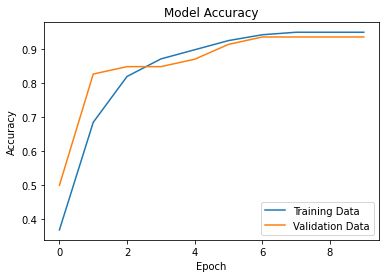

In [18]:
# Accuracy Visualization:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right');

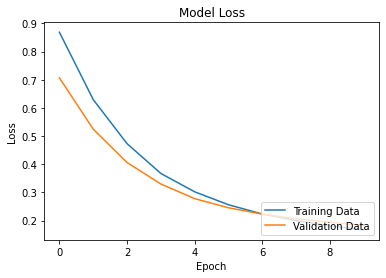

In [19]:
# Loss Visualization:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right');

In [20]:
# Accuracy of the model on testing data:
loss, accuracy = model.evaluate(X_test_sdsr, y_test)
accuracy

4/4 [==============================] - 0s 3ms/step - loss: 0.1332 - accuracy: 0.9737


0.9736841917037964

In [21]:
# Now let's use the model to classify tumors (using probabilites):
y_pred = model.predict(X_test_sdsr)
y_pred

4/4 [==============================] - 0s 2ms/step


array([[0.3547511 , 0.6108767 ],
       [0.947489  , 0.25915504],
       [0.639743  , 0.21408398],
       [0.23697431, 0.7250482 ],
       [0.15908806, 0.84235215],
       [0.9795413 , 0.01193748],
       [0.99535936, 0.0644117 ],
       [0.824105  , 0.38726264],
       [0.34844384, 0.41057232],
       [0.23107554, 0.8555057 ],
       [0.47483107, 0.89775383],
       [0.80127573, 0.46203378],
       [0.32433328, 0.8808276 ],
       [0.8141222 , 0.6263922 ],
       [0.13434419, 0.7272375 ],
       [0.98568803, 0.51834977],
       [0.15841784, 0.7816063 ],
       [0.14740835, 0.95916194],
       [0.11778928, 0.96206445],
       [0.958326  , 0.10245372],
       [0.34268305, 0.53016615],
       [0.35270035, 0.7785316 ],
       [0.96416223, 0.03444193],
       [0.19158886, 0.96294016],
       [0.2661846 , 0.91213316],
       [0.2638992 , 0.66831625],
       [0.14405133, 0.74334246],
       [0.18195108, 0.9374985 ],
       [0.26002586, 0.7753621 ],
       [0.8508353 , 0.07318293],
       [0.

In [22]:
# Converting the prediction probability into class labels:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
